# Multi Agent Reinforcement Learning
In this notebook we create several reinforcement learning environments, based on *open AI*'s FrozenLake game:
- a single-agent frozen lake environment
- a multi-agent/ single goal environment
- a multi-agent/ 4 goals environment

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import time
import random
import sys
import pygame
from collections import defaultdict
import os
import colorsys

from environments import MAPS, FrozenLakeOneGoal, createMap,FrozenLake4goals
from algorithms import SingleGoalCentralQLearning, RandomPolicy,IndependentQLearning,AlternatingIQL
import utils

## Single agent

## Multi agents
### Common goal

In [ ]:
if __name__ == "__main__":
    print("Training the agents...")
    
    num_agent = 2
    n_ep            = int(10e4)
    learning_rate   = 0.1
    discount_factor = 0.9
    explo_rate      = 5.0
    explo_decay     = 0.999
    min_explo_rate  = 0.05
    map_name        = '4x4'
    
    if map_name == None:
        map_size    = 4
    else:
        map_size    = map_name[0]
        
    seed            = 0
    
    map_    = createMap(num_agent, map_size, seed=seed, map_name=None)
    env     = FrozenLakeOneGoal(map_=map_, max_steps=100, num_agents=num_agent) 
    
    trained_agent   = utils.run_simulation(map_, num_agent, learning_rate, discount_factor, explo_rate, explo_decay, min_explo_rate, num_episodes=n_ep)
    print("Training complete!")
    
    # Visualize the learned policy
    print("Visualizing the learned policy...")
    utils.visualizePolicyCommonGoal(env, map_, trained_agent, num_episodes=4, num_agents=num_agent)

### 4 goals

In [2]:
n_agents=4
env_params={"num_agents":n_agents, 
                "grid_size":(8, 8), 
                "slip_prob":0., 
                "hole_prob":0.3, 
                "seed":25, 
                "collaboration_bonus":0,
                "collision_penalty":0}
env=FrozenLake4goals(**env_params)
env.render()

G H . . . . . G
. . . H . . H H
. H H H . H . .
. H . 2 . . . 4
. . . 1 . . . H
. H H 3 H . . .
H H H H . . H .
G . . . . H . G



In this environment there is 4 goals, the maximum reward is attained if all agents are evenly reparted:
- we add a collision penalty of 30 everytime 2 agents are on the same tile
- each goal is worth 100 at first and each time an agent reaches the reward the next reward is halved 

In [3]:
env.reset()
iql_params = {
            "n_agents": n_agents,
            "learning_rate": 0.3,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
        }
##train params
max_episodes=150000   
max_steps=150

iql = IndependentQLearning(env,**iql_params)
results_iql = iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
iql.render_policy()
# utils.save_agent(iql,'iql',env_info=env_params)




 10%|█         | 15257/150000 [00:09<01:08, 1978.41it/s]

Épisode 15000/150000, Récompenses moyennes agents: ['10.50', '8.00', '6.00', '14.00'], Epsilon: 0.6376


 20%|██        | 30162/150000 [00:20<01:52, 1068.20it/s]

Épisode 30000/150000, Récompenses moyennes agents: ['40.00', '30.00', '0.50', '39.00'], Epsilon: 0.4066


 30%|███       | 45158/150000 [00:33<01:22, 1267.99it/s]

Épisode 45000/150000, Récompenses moyennes agents: ['57.00', '54.00', '16.50', '41.00'], Epsilon: 0.2592


 40%|████      | 60290/150000 [00:43<00:50, 1759.47it/s]

Épisode 60000/150000, Récompenses moyennes agents: ['75.00', '70.00', '48.00', '77.00'], Epsilon: 0.1653


 50%|█████     | 75240/150000 [00:52<00:44, 1663.47it/s]

Épisode 75000/150000, Récompenses moyennes agents: ['87.00', '83.00', '74.00', '87.00'], Epsilon: 0.1054


 60%|██████    | 90199/150000 [01:02<00:38, 1550.46it/s]

Épisode 90000/150000, Récompenses moyennes agents: ['92.00', '82.00', '82.00', '92.00'], Epsilon: 0.0672


 70%|███████   | 105178/150000 [01:11<00:26, 1676.77it/s]

Épisode 105000/150000, Récompenses moyennes agents: ['94.00', '92.00', '80.00', '94.00'], Epsilon: 0.0500


 80%|████████  | 120137/150000 [01:20<00:24, 1216.58it/s]

Épisode 120000/150000, Récompenses moyennes agents: ['95.00', '92.00', '85.00', '96.00'], Epsilon: 0.0500


 90%|█████████ | 135306/150000 [01:34<00:13, 1075.39it/s]

Épisode 135000/150000, Récompenses moyennes agents: ['92.00', '89.00', '89.00', '88.00'], Epsilon: 0.0500


100%|██████████| 150000/150000 [01:43<00:00, 1449.89it/s]

Épisode 150000/150000, Récompenses moyennes agents: ['96.00', '90.00', '82.00', '93.00'], Epsilon: 0.0500

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  →  ↓  ←  →  o 
 ↑  ←  ←  o  ↓  ←  o  o 
 ↑  o  o  o  ↓  o  ↓  ↓ 
 ↑  o  ↓  ←  ↓  ←  ↓  ← 
 ↑  ←  ←  ←  ←  ←  ←  o 
 ↑  o  o  ↑  o  ↑  ↑  ↓ 
 o  o  o  o  →  ←  o  → 
 o  o  o  o  ↑  o  o  o 

Politique de l'agent 2:
 o  o  →  →  →  →  →  o 
 ↑  →  ↑  o  →  ↑  o  o 
 ↑  o  o  o  ↑  o  ↓  ↓ 
 ←  o  →  →  ↑  ←  ←  ← 
 →  →  →  →  ↑  ↑  ←  o 
 ←  o  o  ↑  o  →  ↑  → 
 o  o  o  o  →  ←  o  ↑ 
 o  o  o  o  ↑  o  o  o 

Politique de l'agent 3:
 o  o  ↑  ↑  →  →  →  o 
 ↓  ←  ←  o  ↓  ↑  o  o 
 ←  o  o  o  ↓  o  ↓  ↓ 
 ←  o  →  →  ↓  ↓  ←  ← 
 →  →  →  →  →  ↓  ←  o 
 ←  o  o  ↑  o  ↓  ←  ← 
 o  o  o  o  ↓  ←  o  ↑ 
 o  ←  ←  ←  ←  o  o  o 

Politique de l'agent 4:
 o  o  o  →  →  ←  ←  o 
 o  o  o  o  →  ←  o  o 
 o  o  o  o  ↓  o  ↓  ← 
 o  o  →  →  →  →  ↓  ← 
 →  ←  ↑  →  →  →  ↓  o 
 ↑  o  o  ↑  o  →  →  ↓ 
 o  o  o

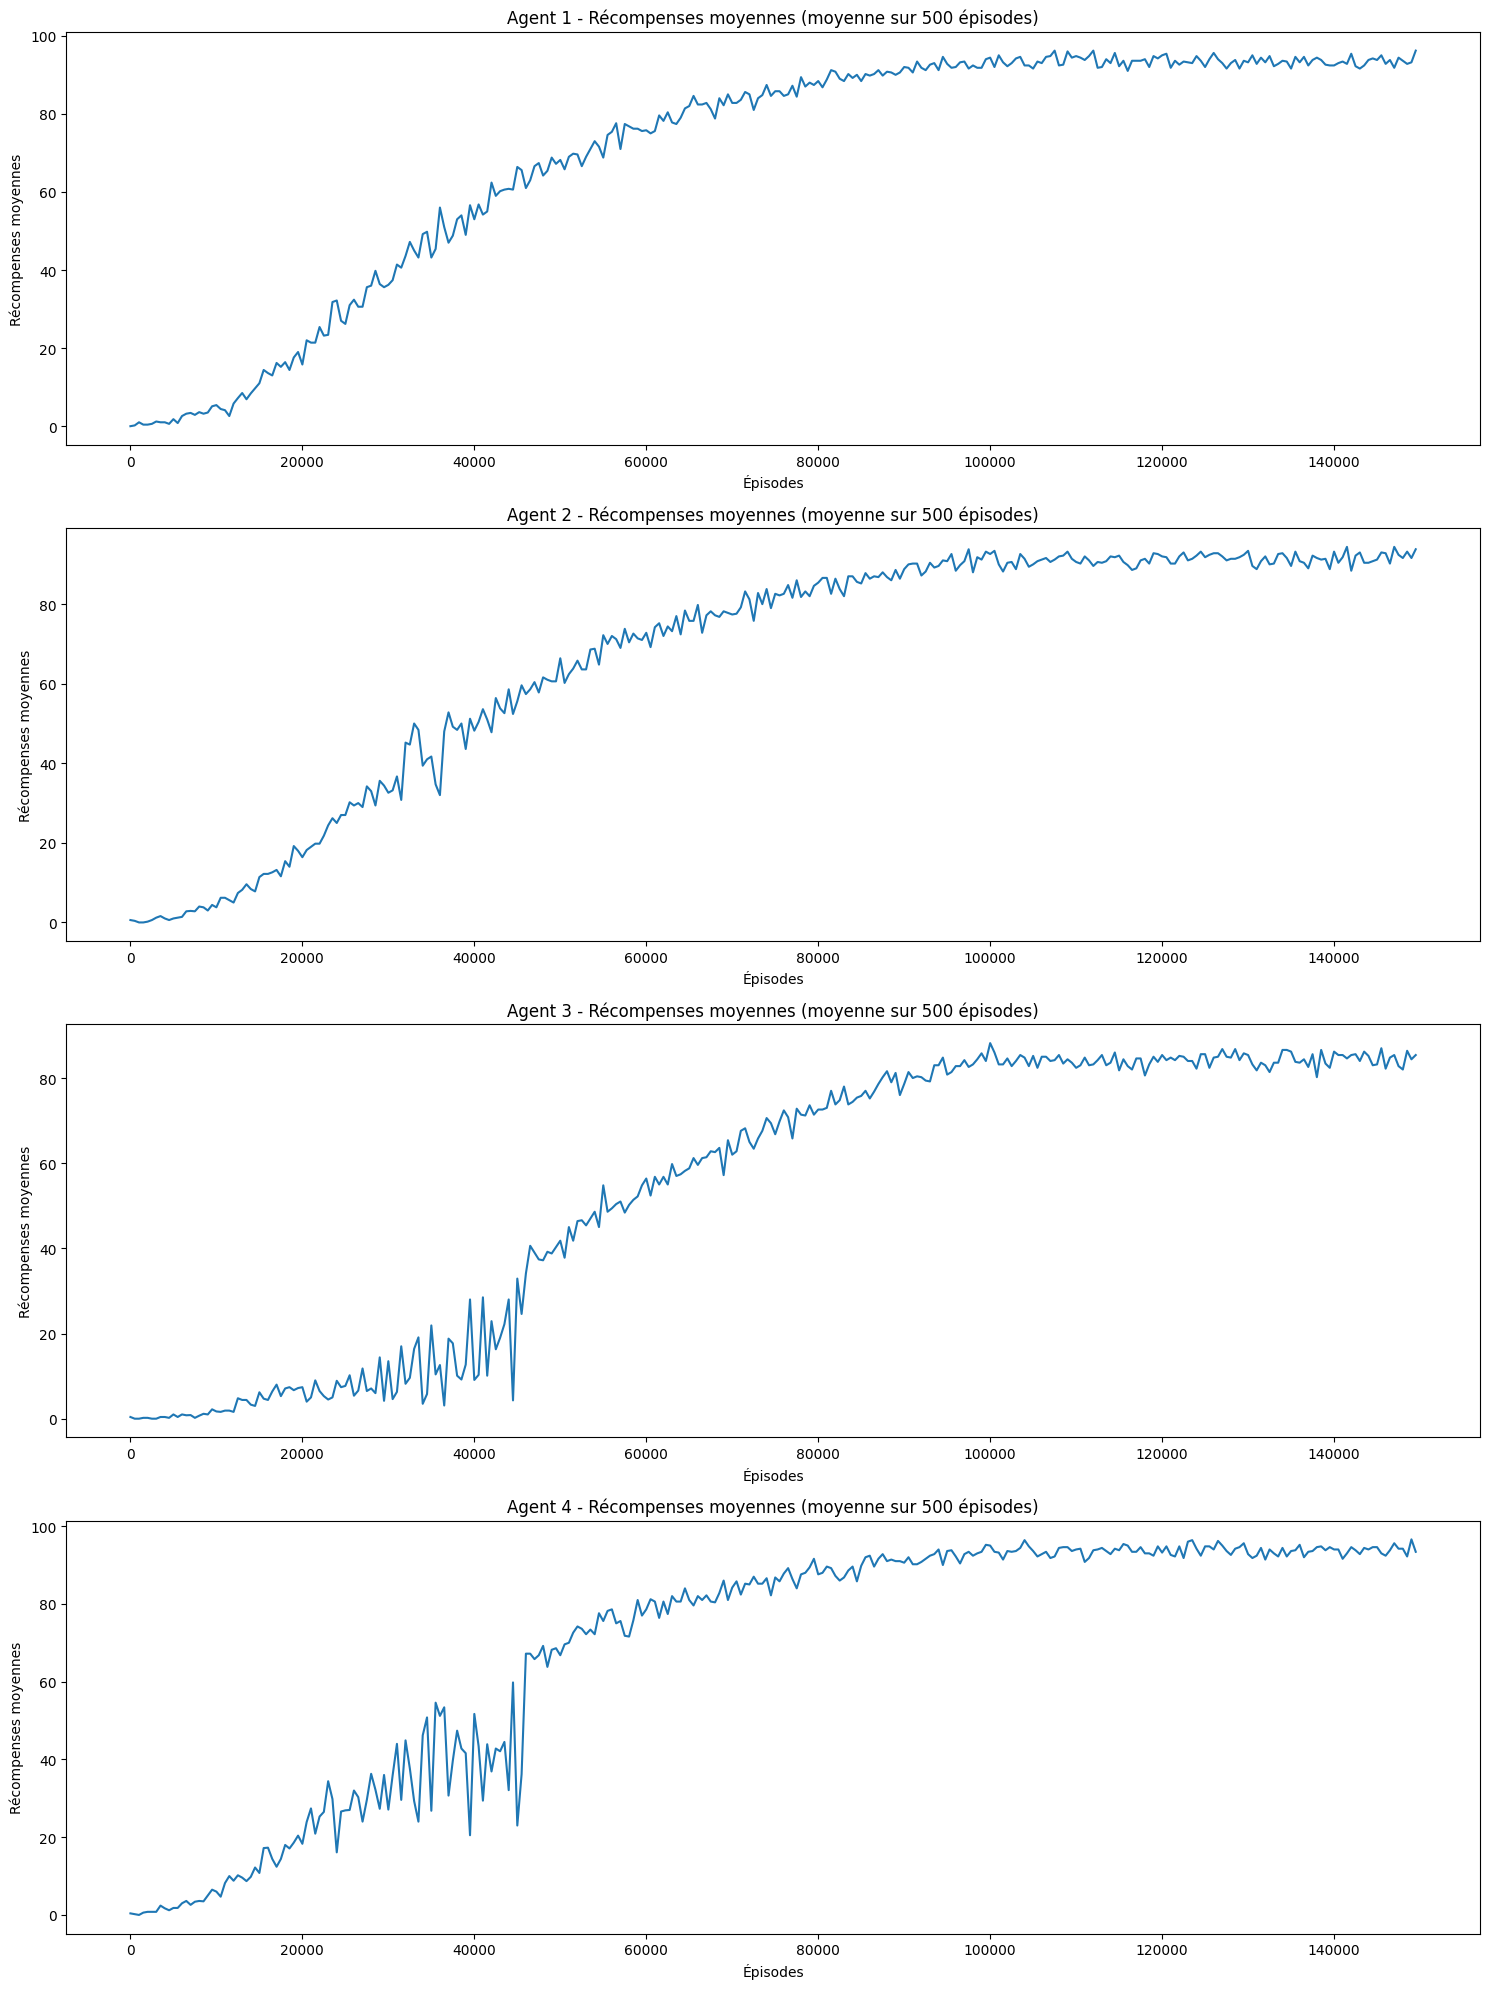

In [4]:
utils.plot_results(iql,results_iql,windows=500)

In [20]:
utils.evaluate_policy(env,iql,verbose=False)

{'agent_rewards': [100, 100, 100, 100],
 'agent_goals': [1, 3, 0, 2],
 'total_reward': 400,
 'steps': 11,
 'success': 4,
 'collision_count': 0,
 'collision_steps': []}

In [5]:
# utils.visualize_policy_pygame_reusable(env,iql,20)

In [ ]:
env.reset()
alt_iql_params = {
            "n_agents": n_agents,
            "base_learning_rate": 0.4,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
            "alternating_period": 1000, # number of episodes each agent learns before switching
            "learning_rate_ratio": 0.1, #the other agents lr=base_lr*ratio
        }
##train params
max_episodes=200000   
max_steps=150

alt_iql = AlternatingIQL(env,**alt_iql_params)
alt_iql_results = alt_iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
alt_iql.render_policy()
# utils.save_agent(alt_iql,'alt_iql',env_info=env_params)

 10%|█         | 20288/200000 [00:12<01:44, 1716.83it/s]

Épisode 20000/200000, Récompenses moyennes agents: ['3.50', '18.00', '15.00', '26.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.549 total _reward: 62.5000


 20%|██        | 40069/200000 [00:30<04:13, 631.21it/s] 

Épisode 40000/200000, Récompenses moyennes agents: ['6.50', '48.00', '39.50', '57.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.301 total _reward: 151.0000


 30%|███       | 60136/200000 [00:52<02:50, 818.75it/s] 

Épisode 60000/200000, Récompenses moyennes agents: ['81.00', '82.00', '5.50', '79.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.165 total _reward: 247.5000


 40%|████      | 80077/200000 [01:23<03:29, 573.74it/s] 

Épisode 80000/200000, Récompenses moyennes agents: ['55.00', '87.50', '54.00', '91.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.091 total _reward: 287.5000


 50%|█████     | 100051/200000 [02:04<04:50, 343.56it/s]

Épisode 100000/200000, Récompenses moyennes agents: ['25.00', '95.00', '84.50', '93.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 297.5000


 60%|██████    | 120298/200000 [02:34<00:49, 1615.23it/s]

Épisode 120000/200000, Récompenses moyennes agents: ['91.50', '95.00', '49.50', '93.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 329.0000


 70%|███████   | 140261/200000 [03:09<00:59, 1007.19it/s]

Épisode 140000/200000, Récompenses moyennes agents: ['40.00', '90.00', '91.00', '93.50'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 314.5000


 80%|████████  | 160162/200000 [03:35<00:44, 889.23it/s] 

Épisode 160000/200000, Récompenses moyennes agents: ['64.00', '96.00', '67.50', '95.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 322.5000


 90%|█████████ | 180346/200000 [04:06<00:12, 1570.09it/s]

Épisode 180000/200000, Récompenses moyennes agents: ['64.50', '94.00', '67.00', '95.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 320.5000


100%|██████████| 200000/200000 [04:40<00:00, 713.14it/s] 

Épisode 200000/200000, Récompenses moyennes agents: ['41.50', '93.00', '85.50', '94.50'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 314.5000

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  ←  ←  ↑  ↑  o 
 ↑  ←  ←  o  ↑  ←  o  o 
 ↑  o  o  o  ↓  o  →  ↓ 
 ↑  o  →  ←  ←  ↓  ↓  → 
 ↑  ←  ←  ←  →  →  ↓  o 
 ←  o  o  ↑  o  →  →  ↓ 
 o  o  o  o  →  ↑  o  ↓ 
 o  ←  ↓  ←  ↑  o  o  o 

Politique de l'agent 2:
 o  o  →  →  →  →  →  o 
 →  →  ↑  o  →  ↑  o  o 
 ↓  o  o  o  ↑  o  ↓  ↓ 
 ←  o  →  →  ↑  ←  ←  ← 
 →  →  →  ↑  ↑  ←  ↑  o 
 ←  o  o  ↑  o  ↑  ↑  ↓ 
 o  o  o  o  →  ↑  o  → 
 o  ←  ←  ←  ←  o  o  o 

Politique de l'agent 3:
 o  o  ↓  →  →  →  →  o 
 ↑  ←  ←  o  ↑  ↑  o  o 
 ↑  o  o  o  ↑  o  →  ↓ 
 ↑  o  ↓  ↓  ↑  →  ↓  → 
 ↑  ←  ←  ←  ←  ←  ↓  o 
 ↑  o  o  ↑  o  ↑  ↑  ↓ 
 o  o  o  o  ↓  ←  o  → 
 o  ←  ←  →  ↑  o  o  o 

Politique de l'agent 4:
 o  o  ↓  ←  ↑  ↓  ←  o 
 ↑  ←  ←  o  ↑  ↑  o  o 
 ↑  o 

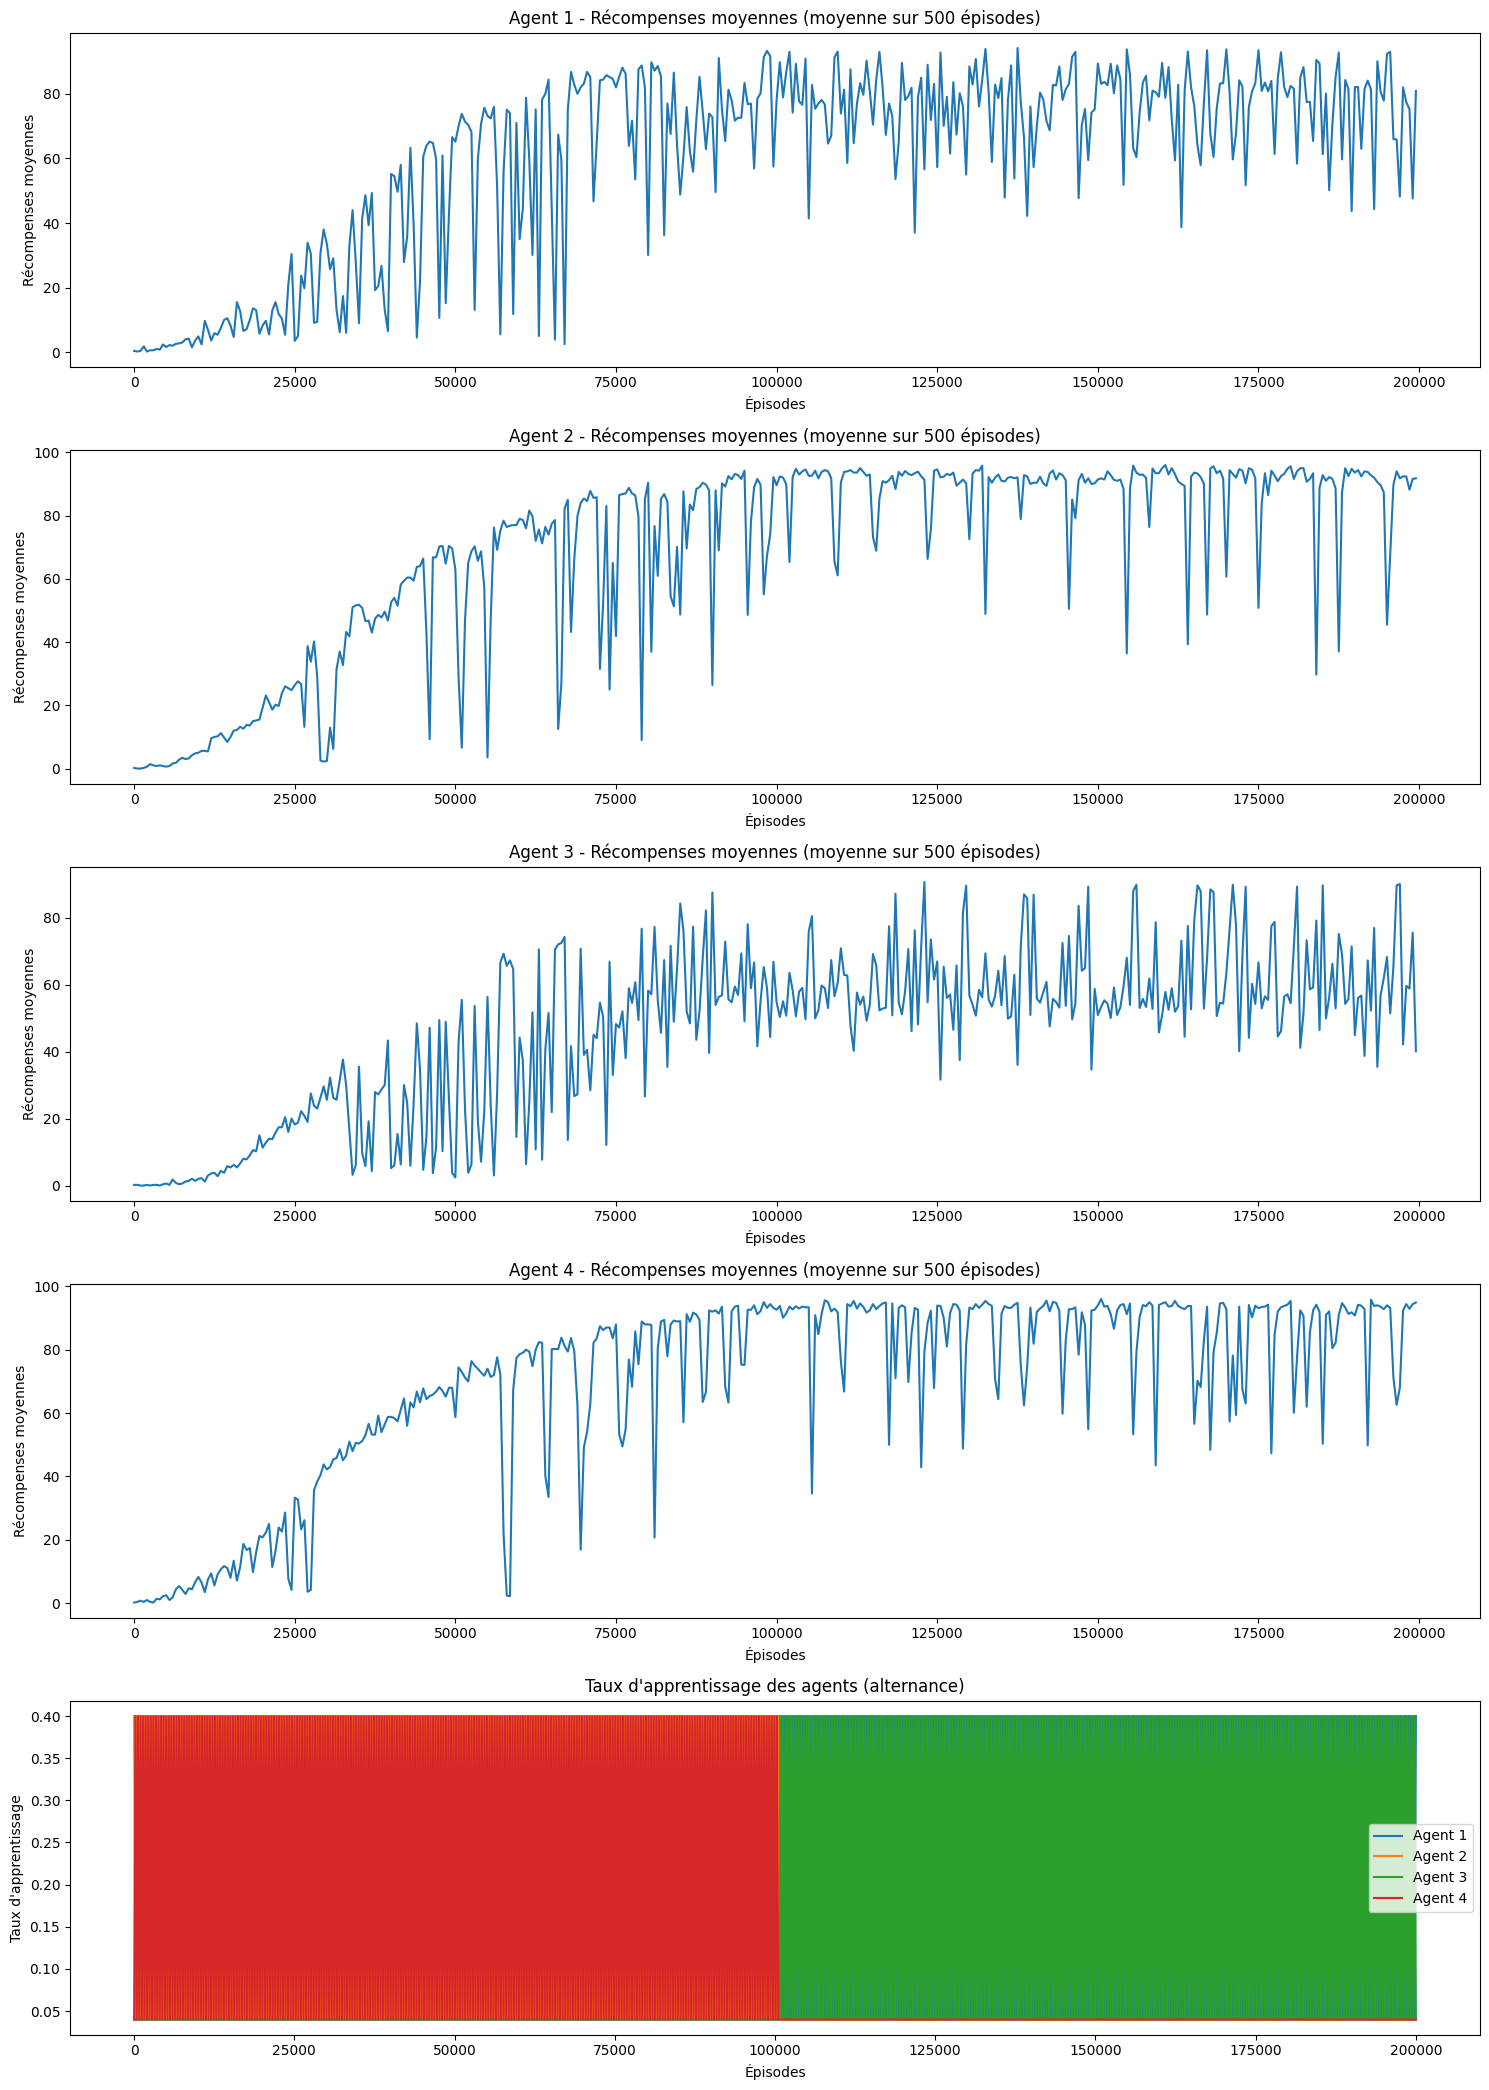

In [7]:
utils.plot_results(alt_iql,alt_iql_results,windows=500)

In [19]:
utils.evaluate_policy(env,alt_iql,verbose=False)

{'agent_rewards': [100, 100, 50.0, 100],
 'agent_goals': [1, 3, 1, 2],
 'total_reward': 350.0,
 'steps': 8,
 'success': 4,
 'collision_count': 0,
 'collision_steps': []}

In [8]:
# utils.visualize_policy_pygame_reusable(env,alt_iql,20)

In [17]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\HP\\side project ml\\MARL\\MARL-project\\rendu_final\\utils.py'>